In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
data = np.loadtxt('LHC_data.txt')
min(data), max(data), len(data)

(np.float64(20.0), np.float64(40.0), 10000)

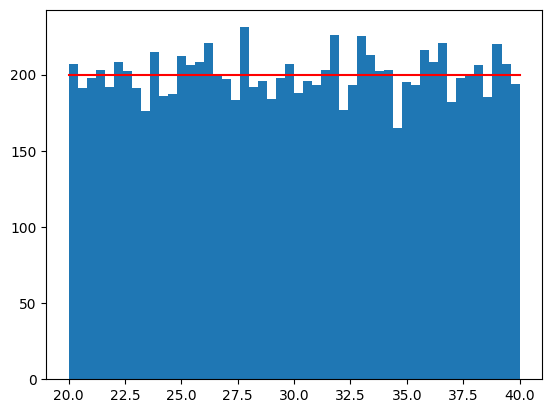

In [3]:
mc = np.random.uniform(min(data), max(data), len(data))

pdf = sp.stats.uniform(loc=min(data), scale=max(data)-min(data)).pdf

counts, bins, _ = plt.hist(mc, bins=50)

x = np.linspace(min(data), max(data), 1000)
plt.plot(x, pdf(x)*len(data)*np.diff(bins)[0], 'r')

In [4]:
def chi2(data, pred):
    return np.sum((data - pred)**2 / pred)

def chi2red(data, pred):
    return chi2(data, pred)/len(data)

bin_center = (bins[1:] + bins[:-1])/2

pred = pdf(bin_center)*len(data)*np.diff(bins)[0]


chi2red(counts, pred)

np.float64(0.9269585746678041)

In [5]:
def throw_toys(N):
    toy = []
    c = []
    for _ in range(N):
        mc = np.random.uniform(min(data), max(data), len(data))
        count, bins = np.histogram(mc, bins=len(pred))
        c.append(count)
        toy.append(chi2(count, pred))
    return toy, c

toys, toy_counts = throw_toys(10000)

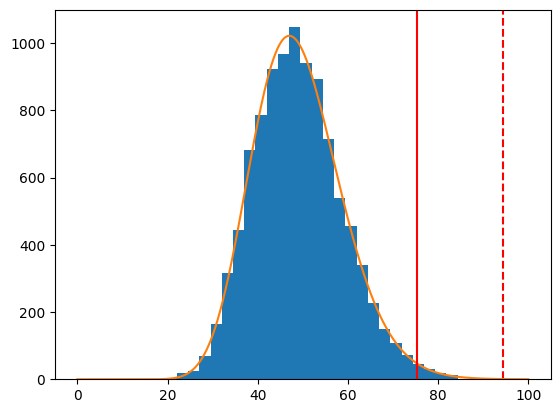

In [7]:
c, b, _ = plt.hist(toys, 30)
alpha = 1-sp.stats.norm.cdf(5)
chi2_crit = np.percentile(toys, 100*(1-alpha))
plt.axvline(chi2_crit, color='r', linestyle='--')

# plot chi2 distribution
x = np.linspace(0, 100, 1000)
plt.plot(
    x,
    sp.stats.chi2.pdf(x, len(counts)-1)* len(toys) * np.diff(b)[0],
)

# unblind
data_counts, _ = np.histogram(data, bins=50)
chi2_data = chi2(data_counts, pred)
plt.axvline(chi2_data, color='r')


In [8]:
p_value = 1-sp.stats.chi2.cdf(chi2_data, len(counts)-1)
p_value

np.float64(0.009209051381682598)

In [9]:
significance = sp.stats.norm.ppf(1-p_value)
significance

np.float64(2.3571036985017892)

(array([171., 190., 190., 220., 206., 195., 185., 214., 199., 204., 199.,
        226., 167., 185., 213., 185., 191., 188., 200., 186., 210., 225.,
        186., 203., 215., 197., 183., 204., 213., 199., 188., 202., 164.,
        197., 174., 202., 210., 266., 228., 192., 205., 179., 207., 201.,
        221., 206., 198., 193., 213., 205.]),
 array([20. , 20.4, 20.8, 21.2, 21.6, 22. , 22.4, 22.8, 23.2, 23.6, 24. ,
        24.4, 24.8, 25.2, 25.6, 26. , 26.4, 26.8, 27.2, 27.6, 28. , 28.4,
        28.8, 29.2, 29.6, 30. , 30.4, 30.8, 31.2, 31.6, 32. , 32.4, 32.8,
        33.2, 33.6, 34. , 34.4, 34.8, 35.2, 35.6, 36. , 36.4, 36.8, 37.2,
        37.6, 38. , 38.4, 38.8, 39.2, 39.6, 40. ]),
 <BarContainer object of 50 artists>)

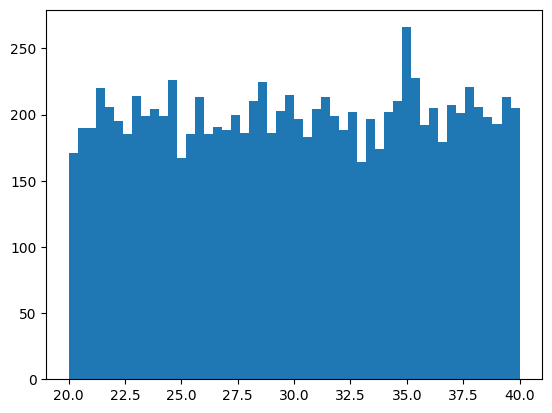

In [10]:
plt.hist(data, bins=50)